# Build a tile index (`tindex`) for a set of DPS output

In [38]:
import geopandas as gpd

In [39]:
!pip install cogeo_mosaic

In [40]:
import cogeo_mosaic
cogeo_mosaic.__version__ # 8.1.0 on pangeo_v3.1.4 got this working again

'8.2.0'

In [41]:
from maap.maap import MAAP
maap = MAAP()

In [42]:
ICESAT2_BOREAL_REPO_PATH = '/projects/code/icesat2_boreal'     
ICESAT2_BOREAL_LIB_PATH = ICESAT2_BOREAL_REPO_PATH + '/lib'

In [43]:
import geopandas as gpd
import pandas as pd
import os

import sys
import s3fs

sys.path.append(ICESAT2_BOREAL_LIB_PATH)

print("Importing packages complete.")

Importing packages complete.


In [44]:
import importlib
import mosaiclib
import maplib_folium
importlib.reload(mosaiclib)
importlib.reload(maplib_folium)

<module 'maplib_folium' from '/projects/code/icesat2_boreal/lib/maplib_folium.py'>

In [45]:
import mosaiclib
from mosaiclib import *

## Build new tindex and MosiacJSONs

In [46]:
DICT_BUILD_TINDEX_ATL08_FILT = {
  'SET': 'ATL08',
 'USER': 'montesano',
 'ALG_NAME': 'run_extract_atl08_covars', 
 'ALG_VERSION': 'extract_atl08_covars',
 'VAR': 'ATL08_filt_extract',
 'BATCH_NAME': '2024',
 'YEAR_LIST': '2024 2025',
 #'DPS_MONTH_LIST': '02 03 10',
 'DPS_MONTH_LIST': '01 02 03 04 05 06 07 08 09 10 11 12',
 'DPS_DAY_MIN': 1,
 'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/boreal_tiles_v004_model_ready.gpkg'
}

In [47]:
DICT_BUILD_TINDEX_HLS = {
  'SET': 'HLS',
 'USER': 'montesano',
 #'ALG_NAME': "do_HLS_stack_3-1-2", 
  'ALG_NAME': "run_build_ms_composite",
 #'ALG_VERSION': 'HLS_stack_2023_v1',
  'ALG_VERSION': 'build_ms_composite_v1',
 'VAR': 'HLS',
 'BATCH_NAME': 'HLS_H30_2019/mc0_mn50_ndvimax_07-01_08-31_2024_2024',#'HLSCONUS_H30_2024',
 'YEAR_LIST': '2025',
 #'DPS_MONTH_LIST': '02 03 10',
'DPS_MONTH_LIST': '06 07',
# 'DPS_MONTH_LIST': '01 02 03 04 05 06 07 08 09 10 11 12',
 'DPS_DAY_MIN': 1,
 'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/boreal_tiles_v004_model_ready.gpkg'
 #   'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg'
}

In [48]:
DICT_BUILD_TINDEX_GLO30CONUS = {
 'SET': 'TOPO',
 'USER': 'montesano',
 'ALG_NAME': 'run_build_stack_topo',
 'ALG_VERSION': 'build_stack_v2024_2',
 'VAR': 'Topo',
 'BATCH_NAME': 'CopernicusGLO30CONUS',
 'YEAR_LIST': '2025',
 'DPS_MONTH_LIST': '03',
 'DPS_DAY_MIN': 1,
 'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg'}

In [49]:
DICT_BUILD_TINDEX_LCCONUS = {
 'SET': 'run_build_stack',
 'USER': 'montesano',
 'ALG_NAME': 'run_build_stack',
 'ALG_VERSION': 'build_stack_v2023_2',
 'VAR': 'LC',
 'BATCH_NAME': 'LCCONUS_ESA_WC_2020',
 'YEAR_LIST': '2025',
 'DPS_MONTH_LIST': '03',
 'DPS_DAY_MIN': 1,
 'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg'}

In [50]:
DICT_BUILD_TINDEX_AGB = {
    'SET' : 'BOREAL_MAP',#'BOREAL_MAP_TEST',
    'USER' : 'aliz237', #'lduncanson', dps_output/run_boreal_biomass_map/dev/AGB_H30_2020/test1/
    'ALG_NAME' : 'run_boreal_biomass_map', 
    'ALG_VERSION' : 'v3.0.0', #'dev_v1.5', #'test-ranger',#'sar_dev', #'boreal_agb_2024_v6',  /run_boreal_biomass_map/dev_v1.5/AGB_H30_2020/test_with_sar/
    'VAR' : 'AGB',
    'BATCH_NAME' : 'AGB_H30_2020/full_run', #'AGB_H30_2024/full_run_no_uncert', #'AGB_S1H30_2020/full_run_no_uncert', #'AGB_S1H30_2020/AGU24', #'AGB_H30_2020/no_uncertainty_sar', #'AGB_H30_2020/Version2_SD',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '01 02 03 04 05 06 07 08 09 10 11 12', #'07 08 09 10',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}

In [51]:
DICT_BUILD_TINDEX_HT = {
    'SET' : 'BOREAL_MAP',#'BOREAL_MAP_TEST',
    'USER' : 'aliz237', #'lduncanson', dps_output/run_boreal_biomass_map/dev/AGB_H30_2020/test1/
    'ALG_NAME' : 'run_boreal_biomass_map', 
    'ALG_VERSION' : 'v3.0.0', # 'dev_v1.5', #'test-ranger',#'sar_dev', #'boreal_agb_2024_v6',  /run_boreal_biomass_map/dev_v1.5/AGB_H30_2020/test_with_sar/
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2023/full_run', #'Ht_H30_2024/AGU24', 'AGB_H30_2024/full_run_no_uncert', #'AGB_S1H30_2020/full_run_no_uncert', #'AGB_S1H30_2020/AGU24', #'AGB_H30_2020/no_uncertainty_sar', #'AGB_H30_2020/Version2_SD',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '01 02 03 04 05 06 07 08 09 10 11 12', #'07 08 09 10',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}

In [52]:
DICT_BUILD_TINDEX_HT_niter_250_ntree_50 = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', #'lduncanson'
    'ALG_NAME' : 'run_boreal_biomass_map',
    #'ALG_VERSION' : 'dev_v1.5', #'boreal_agb_2024_v6',
    'ALG_VERSION': 'dev_v1.6',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/niter_250_ntree_50',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}
DICT_BUILD_TINDEX_HT_niter_250_ntree_100 = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', #'lduncanson'
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION': 'dev_v1.6',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/niter_250_ntree_100',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}
DICT_BUILD_TINDEX_HT_niter_250_ntree_100_no_uncert_moss_lichen_0 = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', 
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION': 'dev_v1.7',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/niter_250_ntree_100_no_uncert_moss_lichen_0',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}
DICT_BUILD_TINDEX_HT_remove_short_veg = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', 
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION': 'dev_v1.9',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/remove_short_veg',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}
DICT_BUILD_TINDEX_HT_zero_short_veg_height = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', 
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION': 'dev_v1.9',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/zero_short_veg_height',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}
DICT_BUILD_TINDEX_HT_zero_short_veg_height_slope15 = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', 
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION': 'dev_v1.10',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/zero_short_veg_height_slope15',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}
DICT_BUILD_TINDEX_HT_niter_250_ntrees_50_10_cores = {
    'SET' : 'BOREAL_MAP',
    'USER' : 'aliz237', 
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION': 'dev_v1.11',
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/niter_250_ntrees_50_10_cores',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '05 06',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}

In [53]:
# s3://maap-ops-workspace/aliz237/data/CONUS/Ht_H30_2020/NEON_38/
# s3://maap-ops-workspace/aliz237/dps_output/run_boreal_biomass_map/conus_ht_test/Ht_H30_2020/NEON_L2A_only/
DICT_BUILD_TINDEX_HTCONUS = {
    'SET' : 'CONUS_MAP',
    'USER' : 'aliz237',
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION' : 'CONUS', 
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/NEON_38',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '03',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg'
}

In [54]:
DICT_BUILD_TINDEX_CACC = {
    'SET' : 'CACC',
    'USER' : 'montesano',
    'ALG_NAME' : 'run_carbon_accumulation',
    'ALG_VERSION' : 'carbon_accumulation_v2', 
    'VAR' : 'CACC',
    'BATCH_NAME' : 'CACC_2020_v3.0_nsims050', #'cacc_2020_v3.0_test3', #'CACC_H30_2020',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '07',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': boreal_tile_index_path
}

In [55]:
def run_build_tindex(DICT_BUILD_TINDEX, DEBUG=False, ENV='pangeo', NO_DPS=False):
    
    DPS_IDENTIFIER = f"{DICT_BUILD_TINDEX['ALG_VERSION']}/{DICT_BUILD_TINDEX['BATCH_NAME']}"

    OUTDIR = f"/projects/my-public-bucket/DPS_tile_lists/{DICT_BUILD_TINDEX['SET']}/{DPS_IDENTIFIER}"
    !mkdir -p $OUTDIR

    # Build tindex
    args = f"--user {DICT_BUILD_TINDEX['USER']} --dps_identifier {DPS_IDENTIFIER} \
    -alg_name {DICT_BUILD_TINDEX['ALG_NAME']} -t {DICT_BUILD_TINDEX['VAR']} -y_list {DICT_BUILD_TINDEX['YEAR_LIST']} \
    --dps_month_list {DICT_BUILD_TINDEX['DPS_MONTH_LIST']} -d_min {DICT_BUILD_TINDEX['DPS_DAY_MIN']} --outdir {OUTDIR} \
    -boreal_tile_index_path {DICT_BUILD_TINDEX['TILES_INDEX_PATH']}"
    
    args += " --RETURN_DUPS"
    if DEBUG:
        args += " --DEBUG"

    if NO_DPS:
        args += " --NO_DPS"

    cmd = f"/opt/conda/envs/{ENV}/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py {args} --WRITE_TINDEX_MATCHES_GDF"
    !echo $cmd
    !eval $cmd

In [56]:
# DICT_BUILD_TINDEX = DICT_BUILD_TINDEX_ATL08_FILT
# DICT_BUILD_TINDEX = DICT_BUILD_TINDEX_HT 
# DICT_BUILD_TINDEX = DICT_BUILD_TINDEX_AGB 
DICT_BUILD_TINDEX_HT
DICT_BUILD_TINDEX_HLS

{'SET': 'HLS',
 'USER': 'montesano',
 'ALG_NAME': 'run_build_ms_composite',
 'ALG_VERSION': 'build_ms_composite_v1',
 'VAR': 'HLS',
 'BATCH_NAME': 'HLS_H30_2019/mc0_mn50_ndvimax_07-01_08-31_2024_2024',
 'YEAR_LIST': '2025',
 'DPS_MONTH_LIST': '06 07',
 'DPS_DAY_MIN': 1,
 'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/boreal_tiles_v004_model_ready.gpkg'}

In [57]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_CACC, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier carbon_accumulation_v2/CACC_2020_v3.0_nsims050 -alg_name run_carbon_accumulation -t CACC -y_list 2025 --dps_month_list 07 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/CACC/carbon_accumulation_v2/CACC_2020_v3.0_nsims050 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		carbon_accumulation_v2/CACC_2020_v3.0_nsims050
Type:		CACC
Year:		['2025']
Month:		['07']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/CACC/carbon_accumulation_v2/CACC_2020_v3.0_nsims050

No duplicates found.

# of duplicate tiles: 0
Final # of tiles: 3681
Writing duplicates csv: /proje

In [69]:
%%time
DICT_BUILD_TINDEX_HLS['BATCH_NAME'] = 'HLS_H30_2024'
DICT_BUILD_TINDEX_HLS['BATCH_NAME'] = 'HLS_H30_2019'

run_build_tindex(DICT_BUILD_TINDEX_HLS, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_ms_composite_v1/HLS_H30_2019 -alg_name run_build_ms_composite -t HLS -y_list 2025 --dps_month_list 06 07 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/HLS/build_ms_composite_v1/HLS_H30_2019 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004_model_ready.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_ms_composite_v1/HLS_H30_2019
Type:		HLS
Year:		['2025']
Month:		['06', '07']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/HLS/build_ms_composite_v1/HLS_H30_2019
Rows before NaN removal: 584
Paths creating null tile_nums: []
Rows after NaN removal: 584
# of duplicate tiles: 5
Final # of tiles:

### Final tindex runs

In [19]:
print(list(range(1380,1386+1)) + list(range(1322,1327+1)) + list(range(1261,1265+1)))

[1380, 1381, 1382, 1383, 1384, 1385, 1386, 1322, 1323, 1324, 1325, 1326, 1327, 1261, 1262, 1263, 1264, 1265]


In [20]:
%%time
DICT_BUILD_TINDEX_HT['BATCH_NAME'] = 'Ht_H30_2024/full_run'
run_build_tindex(DICT_BUILD_TINDEX_HT, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier v3.0.0/Ht_H30_2024/full_run -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 01 02 03 04 05 06 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/v3.0.0/Ht_H30_2024/full_run -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		v3.0.0/Ht_H30_2024/full_run
Type:		HT
Year:		['2025']
Month:		['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/v3.0.0/Ht_H30_2024/full_run
Rows before NaN removal: 608
Paths creating null tile_nums: []
Rows afte

In [21]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_AGB, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier v3.0.0/AGB_H30_2020/full_run -alg_name run_boreal_biomass_map -t AGB -y_list 2025 --dps_month_list 01 02 03 04 05 06 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/v3.0.0/AGB_H30_2020/full_run -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		v3.0.0/AGB_H30_2020/full_run
Type:		AGB
Year:		['2025']
Month:		['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/v3.0.0/AGB_H30_2020/full_run
Rows before NaN removal: 5011
Paths creating null tile_nums: []
Ro

### Test tindex runs

In [22]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_niter_250_ntrees_50_10_cores, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.11/Ht_H30_2020/niter_250_ntrees_50_10_cores -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 06 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.11/Ht_H30_2020/niter_250_ntrees_50_10_cores -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.11/Ht_H30_2020/niter_250_ntrees_50_10_cores
Type:		HT
Year:		['2025']
Month:		['05', '06']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.11/Ht_H30_2020/niter_250_ntrees_50_10_cores
Rows before NaN removal: 18
Paths creating null tile_nums: []
Rows aft

In [23]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_remove_short_veg, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.9/Ht_H30_2020/remove_short_veg -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.9/Ht_H30_2020/remove_short_veg -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.9/Ht_H30_2020/remove_short_veg
Type:		HT
Year:		['2025']
Month:		['05']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.9/Ht_H30_2020/remove_short_veg
Rows before NaN removal: 162
Paths creating null tile_nums: []
Rows after NaN removal: 162

No duplicates found.

# of duplicate ti

In [24]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_zero_short_veg_height_slope15, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.10/Ht_H30_2020/zero_short_veg_height_slope15 -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.10/Ht_H30_2020/zero_short_veg_height_slope15 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.10/Ht_H30_2020/zero_short_veg_height_slope15
Type:		HT
Year:		['2025']
Month:		['05']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.10/Ht_H30_2020/zero_short_veg_height_slope15
Rows before NaN removal: 162
Paths creating null tile_nums: []
Rows after N

In [25]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_zero_short_veg_height, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.9/Ht_H30_2020/zero_short_veg_height -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.9/Ht_H30_2020/zero_short_veg_height -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.9/Ht_H30_2020/zero_short_veg_height
Type:		HT
Year:		['2025']
Month:		['05']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.9/Ht_H30_2020/zero_short_veg_height
Rows before NaN removal: 153
Paths creating null tile_nums: []
Rows after NaN removal: 153

No duplicates found

In [26]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_niter_250_ntree_100_no_uncert_moss_lichen_0, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.7/Ht_H30_2020/niter_250_ntree_100_no_uncert_moss_lichen_0 -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.7/Ht_H30_2020/niter_250_ntree_100_no_uncert_moss_lichen_0 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.7/Ht_H30_2020/niter_250_ntree_100_no_uncert_moss_lichen_0
Type:		HT
Year:		['2025']
Month:		['05']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.7/Ht_H30_2020/niter_250_ntree_100_no_uncert_moss_lichen_0
Rows before NaN removal

In [27]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_niter_250_ntree_50, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.6/Ht_H30_2020/niter_250_ntree_50 -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.6/Ht_H30_2020/niter_250_ntree_50 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.6/Ht_H30_2020/niter_250_ntree_50
Type:		HT
Year:		['2025']
Month:		['05']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.6/Ht_H30_2020/niter_250_ntree_50
Rows before NaN removal: 220
Paths creating null tile_nums: []
Rows after NaN removal: 220
# of duplicate tiles: 76
Final #

In [28]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HT_niter_250_ntree_100, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier dev_v1.6/Ht_H30_2020/niter_250_ntree_100 -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 05 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.6/Ht_H30_2020/niter_250_ntree_100 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		dev_v1.6/Ht_H30_2020/niter_250_ntree_100
Type:		HT
Year:		['2025']
Month:		['05']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/BOREAL_MAP/dev_v1.6/Ht_H30_2020/niter_250_ntree_100
Rows before NaN removal: 211
Paths creating null tile_nums: []
Rows after NaN removal: 211
# of duplicate tiles: 67
Fin

In [29]:
z = pd.read_csv('s3://maap-ops-workspace/shared/montesano/DPS_tile_lists/BOREAL_MAP/dev_v1.6/Ht_H30_2020/niter_250_ntree_100/HT_tindex_master.csv')
z.head()

,index,s3_path,local_path,file,tile_num
0,0,s3://maap-ops-workspace/aliz237/dps_output/run...,/projects/my-private-bucket/dps_output/run_bor...,boreal_ht_2020_202505271748376694_0035805.tif,35805
1,1,s3://maap-ops-workspace/aliz237/dps_output/run...,/projects/my-private-bucket/dps_output/run_bor...,boreal_ht_2020_202505271748376665_0003758.tif,3758
2,2,s3://maap-ops-workspace/aliz237/dps_output/run...,/projects/my-private-bucket/dps_output/run_bor...,boreal_ht_2020_202505271748376662_0001842.tif,1842
3,3,s3://maap-ops-workspace/aliz237/dps_output/run...,/projects/my-private-bucket/dps_output/run_bor...,boreal_ht_2020_202505271748376677_0000936.tif,936
4,4,s3://maap-ops-workspace/aliz237/dps_output/run...,/projects/my-private-bucket/dps_output/run_bor...,boreal_ht_2020_202505271748376651_0002324.tif,2324


In [30]:
%%time
# s3://maap-ops-workspace/aliz237/dps_output/run_boreal_biomass_map/conus_ht_test/Ht_H30_2020/NEON_L2A_only/
DICT_BUILD_TINDEX_HTCONUS_NEON_L2A = {
    'SET' : 'CONUS_MAP',
    'USER' : 'aliz237',
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION' : 'conus_ht_test', 
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/NEON_L2A_only',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '03',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg'
}
DICT_BUILD_TINDEX_HTCONUS_NEON_ATL08 = {
    'SET' : 'CONUS_MAP',
    'USER' : 'aliz237',
    'ALG_NAME' : 'run_boreal_biomass_map',
    'ALG_VERSION' : 'conus_ht_test', 
    'VAR' : 'HT',
    'BATCH_NAME' : 'Ht_H30_2020/NEON_ATL08_only',
    'YEAR_LIST': '2025',
    'DPS_MONTH_LIST' : '03',        
    'DPS_DAY_MIN' : 1 ,
    'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg'
}
run_build_tindex(DICT_BUILD_TINDEX_HTCONUS_NEON_L2A, NO_DPS=False)
run_build_tindex(DICT_BUILD_TINDEX_HTCONUS_NEON_ATL08, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier conus_ht_test/Ht_H30_2020/NEON_L2A_only -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 03 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/CONUS_MAP/conus_ht_test/Ht_H30_2020/NEON_L2A_only -boreal_tile_index_path /projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		conus_ht_test/Ht_H30_2020/NEON_L2A_only
Type:		HT
Year:		['2025']
Month:		['03']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/CONUS_MAP/conus_ht_test/Ht_H30_2020/NEON_L2A_only
Rows before NaN removal: 38
Paths creating null tile_nums: []
Rows after NaN removal: 38

No duplicates found.

# o

In [31]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HLS, NO_DPS=False)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_ms_composite_v1/HLS_H30_2024 -alg_name run_build_ms_composite -t HLS -y_list 2025 --dps_month_list 06 07 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/HLS/build_ms_composite_v1/HLS_H30_2024 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004_model_ready.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_ms_composite_v1/HLS_H30_2024
Type:		HLS
Year:		['2025']
Month:		['06', '07']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/HLS/build_ms_composite_v1/HLS_H30_2024
Rows before NaN removal: 387
Paths creating null tile_nums: []
Rows after NaN removal: 387

No duplicates found.

# of duplicate til

In [32]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_HTCONUS, NO_DPS=True)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user aliz237 --dps_identifier CONUS/Ht_H30_2020/NEON_38 -alg_name run_boreal_biomass_map -t HT -y_list 2025 --dps_month_list 03 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/CONUS_MAP/CONUS/Ht_H30_2020/NEON_38 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg --RETURN_DUPS --NO_DPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		CONUS/Ht_H30_2020/NEON_38
Type:		HT
Year:		['2025']
Month:		['03']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/CONUS_MAP/CONUS/Ht_H30_2020/NEON_38
Rows before NaN removal: 38
Paths creating null tile_nums: []
Rows after NaN removal: 38

No duplicates found.

# of duplicate tiles: 0
Final # of tiles: 38
Writi

In [17]:
DICT_BUILD_TINDEX_FORESTAGE2020

{'SET': 'FORESTAGE',
 'USER': 'montesano',
 'ALG_NAME': 'run_build_stack',
 'ALG_VERSION': 'build_stack_v2023_2',
 'VAR': 'FORESTAGE',
 'BATCH_NAME': 'FORESTAGE_BES_2020',
 'YEAR_LIST': '2025',
 'DPS_MONTH_LIST': '07 08 09 10 11 12',
 'DPS_DAY_MIN': 1,
 'TILES_INDEX_PATH': '/projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg'}

In [19]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_FORESTAGE2020)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2023_2/FORESTAGE_BES_2020 -alg_name run_build_stack -t FORESTAGE -y_list 2025 --dps_month_list 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/FORESTAGE/build_stack_v2023_2/FORESTAGE_BES_2020 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2023_2/FORESTAGE_BES_2020
Type:		FORESTAGE
Year:		['2025']
Month:		['07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/FORESTAGE/build_stack_v2023_2/FORESTAGE_BES_2020
Rows before NaN removal: 4958
Paths creating null tile_nums: []
Rows after 

In [34]:
gdf = gpd.read_file('/projects/my-public-bucket/DPS_tile_lists/FORESTAGE/build_stack_v2023_2/FORESTAGE_BES_2020/FORESTAGE_tindex_master.gpkg')

In [35]:
#gdf.explore()

In [36]:
import matplotlib.pyplot as plt
import math
import rasterio
from rasterio.plot import show_hist, show

In [37]:
rm_list = [3278, 3465, 3560, 3466, 3569, 3570, 3478]
z = pd.read_csv('/projects/my-public-bucket/DPS_tile_lists/FORESTAGE/build_stack_v2023_2/FORESTAGE_BES_2020/FORESTAGE_tindex_master.csv')
zz = z[z.tile_num.isin(rm_list)]
fn_list = zz.s3_path.to_list()

s3://maap-ops-workspace/montesano/dps_output/run_build_stack/build_stack_v2023_2/FORESTAGE_BES_2020/2025/03/17/10/03/59/519207/FORESTAGE_BES_2020_3466_cog.tif
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -9999.0, 'width': 3000, 'height': 3000, 'count': 2, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",180],PARAMETER["standard_parallel_1",50],PARAMETER["standard_parallel_2",70],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 2168521.9999999953,
       0.0, -30.0, 3123304.0000000093), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave'

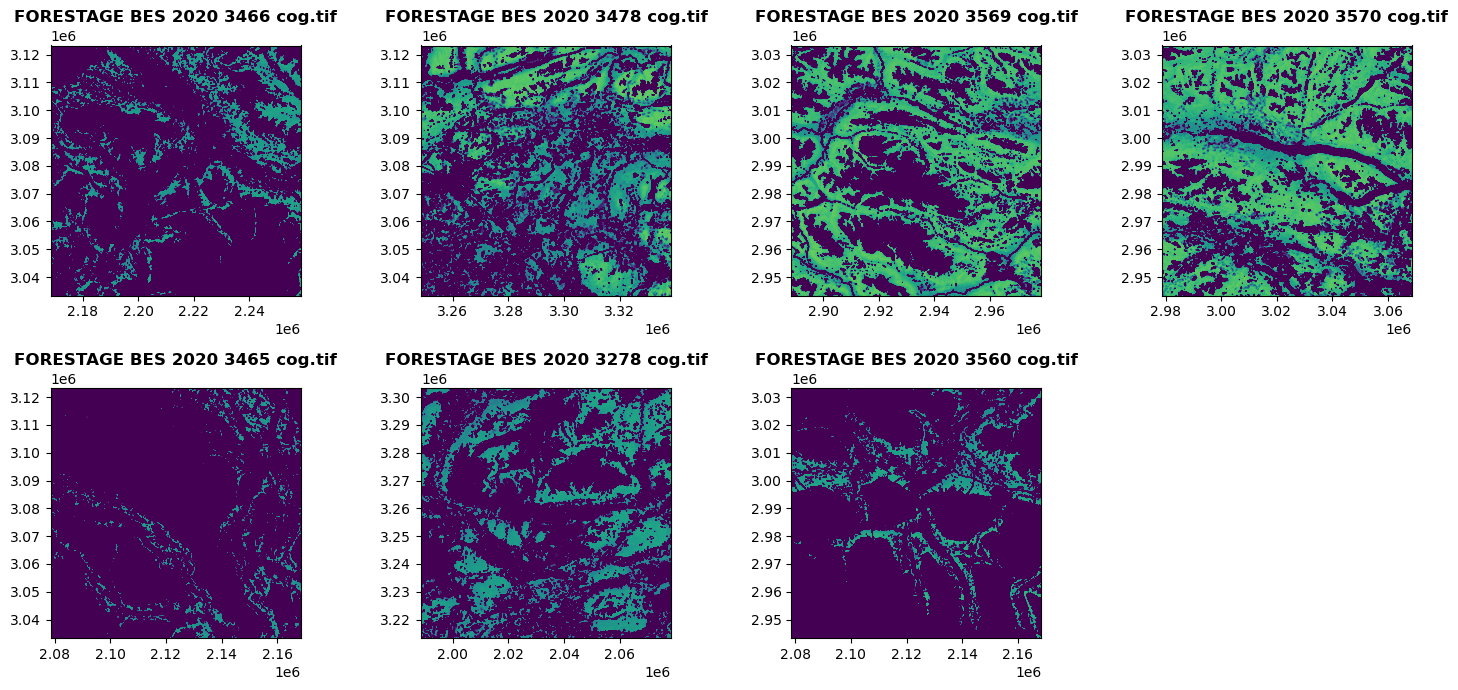

In [38]:
# Determine the grid size
n_facets = len(fn_list)
cols = 4  # Number of columns in the grid
rows = math.ceil(n_facets / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 3.5 * rows), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten in case we have a 2D array of axes

for i, fn in enumerate(fn_list):
    print(fn)
    with rasterio.open(fn) as src:
        print(src.profile)
        show(src.read(1),transform=src.transform, ax=axes[i], title=os.path.basename(fn).replace('_', ' '), vmin=0, vmax=250)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [39]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_FORESTAGE100m)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier tile_forestage_v1/forestage_2020 -alg_name run_tile_forestage -t FORESTAGE100m -y_list 2025 --dps_month_list 01 02 03 04 05 06 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/FORESTAGE100m/tile_forestage_v1/forestage_2020 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		tile_forestage_v1/forestage_2020
Type:		FORESTAGE100m
Year:		['2025']
Month:		['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/FORESTAGE100m/tile_forestage_v1/forestage_2020
Rows before NaN removal: 5

In [40]:
%%time
run_build_tindex(mosaiclib.DICT_BUILD_TINDEX_DECPRED2015)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2023_2/DECPRED_AB_2015 -alg_name run_build_stack -t DECIDFRAC -y_list 2025 --dps_month_list 03 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/DECIDFRAC/build_stack_v2023_2/DECPRED_AB_2015 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2023_2/DECPRED_AB_2015
Type:		DECIDFRAC
Year:		['2025']
Month:		['03']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/DECIDFRAC/build_stack_v2023_2/DECPRED_AB_2015
Rows before NaN removal: 1606
Paths creating null tile_nums: []
Rows after NaN removal: 1606

No duplicates found.

# of duplicate t

In [41]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_LCCONUS)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2023_2/LCCONUS_ESA_WC_2020 -alg_name run_build_stack -t LC -y_list 2025 --dps_month_list 03 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/run_build_stack/build_stack_v2023_2/LCCONUS_ESA_WC_2020 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2023_2/LCCONUS_ESA_WC_2020
Type:		LC
Year:		['2025']
Month:		['03']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/run_build_stack/build_stack_v2023_2/LCCONUS_ESA_WC_2020
Rows before NaN removal: 1600
Paths creating null tile_nums: []
Rows after NaN removal: 1600
# of duplicate 

In [42]:
%%time
run_build_tindex(DICT_BUILD_TINDEX_GLO30CONUS)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2024_2/CopernicusGLO30CONUS -alg_name run_build_stack_topo -t Topo -y_list 2025 --dps_month_list 03 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/TOPO/build_stack_v2024_2/CopernicusGLO30CONUS -boreal_tile_index_path /projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2024_2/CopernicusGLO30CONUS
Type:		Topo
Year:		['2025']
Month:		['03']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/TOPO/build_stack_v2024_2/CopernicusGLO30CONUS
Rows before NaN removal: 1565
Paths creating null tile_nums: []
Rows after NaN removal: 1565

No duplicates found.

#

In [43]:
%%time
DICT_BUILD_TINDEX_HLS['BATCH_NAME'] = 'HLSCONUS_H30_2023'
run_build_tindex(DICT_BUILD_TINDEX_HLS)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_ms_composite_v1/HLSCONUS_H30_2023 -alg_name run_build_ms_composite -t HLS -y_list 2025 --dps_month_list 06 07 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/HLS/build_ms_composite_v1/HLSCONUS_H30_2023 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004_model_ready.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_ms_composite_v1/HLSCONUS_H30_2023
Type:		HLS
Year:		['2025']
Month:		['06', '07']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/HLS/build_ms_composite_v1/HLSCONUS_H30_2023
Nothing found. Check year and month. Exiting.
CPU times: user 34.2 ms, sys: 63 ms, total: 97.2 ms
Wall time: 5.9

In [44]:
%%time
run_build_tindex(mosaiclib.DICT_BUILD_TINDEX_TCC2020)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2023_2/TCC_TP_2020 -alg_name run_build_stack -t TCC -y_list 2024 2025 --dps_month_list 01 02 03 04 05 06 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/TCC/build_stack_v2023_2/TCC_TP_2020 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2023_2/TCC_TP_2020
Type:		TCC
Year:		['2024', '2025']
Month:		['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/TCC/build_stack_v2023_2/TCC_TP_2020
Rows before NaN removal: 3493
Paths creating null tile_nums:

In [45]:
%%time
run_build_tindex(mosaiclib.DICT_BUILD_TINDEX_TCCTREND2020)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2023_2/TCCTREND_TP_2020 -alg_name run_build_stack -t TCCTREND -y_list 2024 2025 --dps_month_list 01 02 03 04 05 06 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/TCCTREND/build_stack_v2023_2/TCCTREND_TP_2020 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2023_2/TCCTREND_TP_2020
Type:		TCCTREND
Year:		['2024', '2025']
Month:		['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/TCCTREND/build_stack_v2023_2/TCCTREND_TP_2020
Rows before NaN remo

In [46]:
%%time
run_build_tindex(mosaiclib.DICT_BUILD_TINDEX_TCCTRENDPVAL2020)

/opt/conda/envs/pangeo/bin/python /projects/code/icesat2_boreal/lib/build_tindex_master.py --user montesano --dps_identifier build_stack_v2023_2/TCCTRENDPVAL_TP_2020 -alg_name run_build_stack -t TCCTREND -y_list 2025 --dps_month_list 03 04 05 06 07 08 09 10 11 12 -d_min 1 --outdir /projects/my-public-bucket/DPS_tile_lists/TCCTRENDPVAL/build_stack_v2023_2/TCCTRENDPVAL_TP_2020 -boreal_tile_index_path /projects/shared-buckets/montesano/databank/boreal_tiles_v004.gpkg --RETURN_DUPS --WRITE_TINDEX_MATCHES_GDF
NASA MAAP
INFO: Pandarallel will run on 25 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
NASA MAAP

Building a list of tiles:
DPS ID:		build_stack_v2023_2/TCCTRENDPVAL_TP_2020
Type:		TCCTREND
Year:		['2025']
Month:		['03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Days:		1-31

Output dir:  /projects/my-public-bucket/DPS_tile_lists/TCCTRENDPVAL/build_stack_v2023_2/TCCTRENDPVAL_TP_2020
Rows before NaN removal: 36

In [47]:
#!aws s3 rm --recursive s3://maap-ops-workspace/montesano/dps_output/run_build_stack_topo/build_stack_v2024_2/CopernicusGLO30CONUS/2025/03/06/17

In [48]:
import s3fs
s3 = s3fs.S3FileSystem(anon=True)

### Check the tindex

In [49]:
z = pd.read_csv('/projects/my-public-bucket/DPS_tile_lists/FORESTAGE100m/tile_forestage_v1/forestage_2020/FORESTAGE100m_tindex_master.csv')
z_sub = z[z['creation time'] > '2025-03-09']
z_sub.head()

,index,s3_path,local_path,file,tile_num,creation time
0,0,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,forestage_2020_0003570.tif,3570,2025-03-17 09:44:32
1,1,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,forestage_2020_0003478.tif,3478,2025-03-17 09:34:52
2,2,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,forestage_2020_0003465.tif,3465,2025-03-17 09:32:00
3,3,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,forestage_2020_0003569.tif,3569,2025-03-17 09:29:46
4,4,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,forestage_2020_0003560.tif,3560,2025-03-17 09:26:03


In [50]:
tindex = gpd.read_file('/projects/my-public-bucket/DPS_tile_lists/FORESTAGE100m/tile_forestage_v1/forestage_2020/FORESTAGE100m_tindex_master.gpkg')
#print(tindex.tile_num.to_list())
#tindex.explore()
tindex.head()

,tile_num,tile_version,tile_group,map_version,s3_path,local_path,geometry
0,3570,version 1,north america centra,none,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,"POLYGON ((2978522 3033304, 3068522 3033304, 30..."
1,3478,version 1,north america centra,none,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,"POLYGON ((3248522 3123304, 3338522 3123304, 33..."
2,3465,version 1,north america west,none,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,"POLYGON ((2078522 3123304, 2168522 3123304, 21..."
3,3569,version 1,north america centra,none,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,"POLYGON ((2888522 3033304, 2978522 3033304, 29..."
4,3560,version 1,north america west,none,s3://maap-ops-workspace/montesano/dps_output/r...,/projects/my-private-bucket/dps_output/run_til...,"POLYGON ((2078522 3033304, 2168522 3033304, 21..."


### Find missing

In [51]:
boreal_tiles = gpd.read_file(boreal_tile_index_path.replace('.gpkg','_model_ready.gpkg'))
#tile_grid = gpd.read_file('/projects/shared-buckets/montesano/databank/tile_grid_conus_centamerica.gpkg')

In [52]:
#b_tiles = gpd.read_file(boreal_tile_index_path)

#### boreal

In [53]:
TILES_LIST = boreal_tiles.tile_num.to_list()
print(len(TILES_LIST))
boreal_tiles.shape

4956


(4956, 6)

In [54]:
fn_list = [
            # mosaiclib.HT_MOSAIC_JSON_FN_DICT['2020_v2.0'].replace('_mosaic.json','.csv'),
            # mosaiclib.HT_MOSAIC_JSON_FN_DICT['2020_v2.1'].replace('_mosaic.json','.csv'),
            # mosaiclib.HT_MOSAIC_JSON_FN_DICT['2020_v2.2'].replace('_mosaic.json','.csv'),
            # mosaiclib.AGB_MOSAIC_JSON_FN_DICT['2020_v2.0'].replace('_mosaic.json','.csv'),
            # mosaiclib.AGB_MOSAIC_JSON_FN_DICT['2020_v2.1'].replace('_mosaic.json','.csv'),
            # mosaiclib.AGB_MOSAIC_JSON_FN_DICT['2020_v2.2'].replace('_mosaic.json','.csv'),
            # mosaiclib.HLS_MOSAIC_JSON_FN_DICT['2020'].replace('_mosaic.json','.csv'),
            mosaiclib.MISC_MOSAIC_JSON_FN_DICT['FORESTAGE100m_2020'].replace('_mosaic.json','.csv'),
]
fn_list

['s3://maap-ops-workspace/shared/montesano/DPS_tile_lists/FORESTAGE100m/tile_forestage_v1/forestage_2020/FORESTAGE100m_tindex_master.csv']

In [55]:
f'/projects/my-public-bucket/databank/HAVE_{os.path.split(fn)[-1]}'

'/projects/my-public-bucket/databank/HAVE_FORESTAGE_BES_2020_3560_cog.tif'

In [56]:
DICT_NEEDS = dict()
for fn in fn_list:
    print(fn)
    tindex = pd.read_csv(fn)
    print(tindex.shape)
    print(f'{boreal_tiles.shape[0]-tindex.shape[0]} missing.')

    #TILES_LIST
    HAVE_LIST = tindex.tile_num.to_list()
    HAVE_LIST.to_csv(f'/projects/my-public-bucket/databank/HAVE_{os.path.split(fn)[-1]}')
    NEED_LIST = list(set(TILES_LIST)-set(HAVE_LIST))
    print(len(HAVE_LIST))
    print(len(NEED_LIST))
    DICT_NEEDS.update({fn: NEED_LIST})

s3://maap-ops-workspace/shared/montesano/DPS_tile_lists/FORESTAGE100m/tile_forestage_v1/forestage_2020/FORESTAGE100m_tindex_master.csv
(4956, 6)
0 missing.


AttributeError: 'list' object has no attribute 'to_csv'

#### CONUS + Americas

In [ ]:
TILES_LIST = tile_grid.tile_num.to_list()
print(len(TILES_LIST))
tile_grid.shape

In [ ]:
fn_list = [
            mosaiclib.TOPO_MOSAIC_JSON_FN_DICT['2020CONUS'].replace('_mosaic.json','.csv'),
            mosaiclib.LC_MOSAIC_JSON_FN_DICT['2020CONUS'].replace('_mosaic.json','.csv'),
            mosaiclib.HLS_MOSAIC_JSON_FN_DICT['2024CONUS'].replace('_mosaic.json','.csv')
]
fn_list

In [ ]:
DICT_NEEDS = dict()
for fn in fn_list:
    print(fn)
    tindex = pd.read_csv(fn)
    print(tindex.shape)
    print(f'{tile_grid.shape[0]-tindex.shape[0]} missing.')

    #TILES_LIST
    NEED_LIST = list(set(TILES_LIST)-set(tindex.tile_num.to_list()))
    print(NEED_LIST,'\n')
    DICT_NEEDS.update({fn: NEED_LIST})

In [ ]:
DICT_NEEDS

In [ ]:
tindex_tcctrend = pd.read_csv(fn_tcctrend)

In [ ]:
tindex_ht.shape

In [ ]:
tindex_agb.shape

In [ ]:
TP_TILES_LIST = tindex_age.tile_num.to_list() + tindex_tcctrend.tile_num.to_list() + tindex_age.tile_num.to_list()
len(list(set(TP_TILES_LIST)))

In [ ]:
# Age tiles not in TP tile list yet
NEED_LIST_AGE = list(set(TP_TILES_LIST)-set(tindex_age.tile_num.to_list()))
print(NEED_LIST_AGE)

In [ ]:
# trend tiles not in TP tile list yet
NEED_LIST_TCCTREND = list(set(TP_TILES_LIST)-set(tindex_tcctrend.tile_num.to_list()))
print(NEED_LIST_TCCTREND)

In [ ]:
# TCC tiles not in TP tile list yet
NEED_LIST_TCC2020 = list(set(TP_TILES_LIST)-set(tindex_tcc2020.tile_num.to_list()))
print(len(NEED_LIST_TCC2020))

In [ ]:
boreal_tiles_need = boreal_tiles[boreal_tiles.tile_num.isin([39621] )]
boreal_tiles_need.explore()

In [ ]:
boreal_tiles_age = boreal_tiles[boreal_tiles.tile_num.isin(list(set(TP_TILES_LIST)) )]
boreal_tiles_age.explore()

In [ ]:
boreal_tiles_tcctrend = boreal_tiles[boreal_tiles.tile_num.isin(tindex_tcctrend.tile_num.to_list())]
#boreal_tiles_tcctrend.explore()

In [ ]:
#boreal_tiles[~boreal_tiles.tile_num.isin(tindex_age.tile_num.to_list())]

In [ ]:
MISSING_LIST_AGB = boreal_tiles[~boreal_tiles.tile_num.isin(tindex_agb.tile_num.to_list())].tile_num.to_list()
MISSING_LIST_AGB

In [ ]:
MISSING_LIST_HT = boreal_tiles[~boreal_tiles.tile_num.isin(tindex_ht.tile_num.to_list())].tile_num.to_list()
MISSING_LIST_HT

In [ ]:
ATL08_FILT_TINDEX_FN_DICT['2020']

In [ ]:
tindex_atl08 = pd.read_csv(ATL08_FILT_TINDEX_FN_DICT['2020'])
ATL08_TILES = tindex_atl08.tile_num.to_list()
len(ATL08_TILES)

In [ ]:
tindex_atl08[tindex_atl08.tile_num.isin([23497, 23498, 23499])]

In [ ]:
tindex_agb[tindex_agb.tile_num == 22937].s3_path.to_list()[0]

In [ ]:
#boreal_tiles.explore(m=boreal_tiles_orig[boreal_tiles_orig.tile_num.isin(NEED_LIST)].explore(color='red'))

In [ ]:
s3 = s3fs.S3FileSystem(anon=True)

## Get duplicate tile dirs to delete

In [ ]:
# delete dup tiles
dups_df = pd.read_csv(f'/projects/my-public-bucket/DPS_tile_lists/FORESTAGE/build_stack_v2023_2/FORESTAGE_BES_2020/FORESTAGE_tindex_master_duplicates.csv')
DELETE_DIR_LIST = [os.path.dirname(x) for x in dups_df.s3_path.to_list()]

print(len( DELETE_DIR_LIST))  
DELETE_DIR_LIST[0]

### Delete the DPS dirs of these tiles

In [ ]:
%%time
print(f'Deleting {len(DELETE_DIR_LIST)} dirs recursively ...')  
for d in DELETE_DIR_LIST:
    !aws s3 rm --quiet --recursive $d 